# Health Insurance Lead Prediction

## Life cycle for Data Science Project

1. Data Gathering
2. Exploratory Data Analysis 
3. Feature Engineering 
4. Feature Selection
5. Model Building

------------------


In [ ]:
!pip install catboost

In [ ]:
!pip install shap

In [ ]:
!pip install colorama

In [ ]:
!pip install category_encoders

In [ ]:
!pip install bayesian-optimization

In [ ]:
!pip install scikit-optimize

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
pd.set_option('display.max_columns', None)
%matplotlib inline
import shap
shap.initjs()
import time
import colorama  # https://pypi.python.org/pypi/colorama

### Feature Processing
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from dateutil import relativedelta
from sklearn.preprocessing import LabelEncoder

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier,Pool

### Metrics
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingClassifier

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
display(train_data.head(2))
display(test_data.head(2))
print(train_data.shape,test_data.shape)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8


(50882, 14) (21805, 13)


### 2.Exploratory Data Analysis

EDA is Done to find out following :
1. Missing values
2. Numerical Variables
3. Distribution of Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between Each Independent and Dependent Feature (Sales Price)

##### 1. Missing Values 

- We will check whether there is any missing value in Dataset 
- Percentage of NAN values in Each Feaure

In [ ]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64


Dropping Features which are not useful

In [ ]:
train_data = train_data.drop(['ID'],axis=1)
test_data = test_data.drop(['ID'],axis=1)
print(train_data.shape,test_data.shape)

(50882, 13) (21805, 12)


Reformatting Values

In [ ]:
train_data['Holding_Policy_Duration'] = np.where((train_data['Holding_Policy_Duration']=='14+'),'99.0',train_data['Holding_Policy_Duration'])
test_data['Holding_Policy_Duration'] = np.where((test_data['Holding_Policy_Duration']=='14+'),'99.0',test_data['Holding_Policy_Duration'])

### Missing Values Imputation

We can see that Holding_Policy_Duration and Holding_Policy_Type are MNAR,We will Impute it by creating a new NAN features

In [ ]:
train_data['Holding_Policy_Duration_NAN'] = np.where(train_data['Holding_Policy_Duration'].isnull(),1,0)
test_data['Holding_Policy_Duration_NAN'] = np.where(test_data['Holding_Policy_Duration'].isnull(),1,0)

train_data['Holding_Policy_Type_NAN'] = np.where(train_data['Holding_Policy_Type'].isnull(),1,0)
test_data['Holding_Policy_Type_NAN'] = np.where(test_data['Holding_Policy_Type'].isnull(),1,0)

train_data['Health Indicator_NAN'] = np.where(train_data['Health Indicator'].isnull(),1,0)
test_data['Health Indicator_NAN'] = np.where(test_data['Health Indicator'].isnull(),1,0)

In [ ]:
train_data['Holding_Policy_Duration_Policy_Type_NAN'] = np.where(train_data['Holding_Policy_Duration'].isnull() & train_data['Holding_Policy_Type'].isnull(),1,0)
train_data['Holding_Policy_Dur_Type_Health_Indicator_NAN'] = np.where(train_data['Holding_Policy_Type'].isnull() & train_data['Health Indicator'].isnull() & train_data['Holding_Policy_Duration'].isnull(),1,0)

test_data['Holding_Policy_Duration_Policy_Type_NAN'] = np.where(test_data['Holding_Policy_Duration'].isnull() & test_data['Holding_Policy_Type'].isnull(),1,0)
test_data['Holding_Policy_Dur_Type_Health_Indicator_NAN'] = np.where(test_data['Holding_Policy_Type'].isnull() & test_data['Health Indicator'].isnull() & test_data['Holding_Policy_Duration'].isnull(),1,0)

In [ ]:
display(train_data.head(2))
display(test_data.head(2))

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,1,1,0,1,0


,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN
0,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0,0,0,1,0,0
1,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0


### Now we will impute the Missing values

In [ ]:
train_data['Holding_Policy_Duration'] = train_data['Holding_Policy_Duration'].fillna('-1.0')
test_data['Holding_Policy_Duration'] = test_data['Holding_Policy_Duration'].fillna('-1.0')

train_data['Holding_Policy_Duration'] = train_data['Holding_Policy_Duration'].astype(float)
test_data['Holding_Policy_Duration'] = test_data['Holding_Policy_Duration'].astype(float)

train_data['Holding_Policy_Type'] = train_data['Holding_Policy_Type'].fillna(-1.0)
test_data['Holding_Policy_Type'] = test_data['Holding_Policy_Type'].fillna(-1.0)

train_data['Health Indicator'] = train_data['Health Indicator'].fillna('UNK')
test_data['Health Indicator'] = test_data['Health Indicator'].fillna('UNK')

display(train_data.head())
display(test_data.head())

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1,0,0,1,0,0
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0,0,0,0,0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,0,0,0,0,0


,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN
0,C1,156,Owned,Individual,30,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0
1,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0
2,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0,0,0,0,0,0
3,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0,0,0,0,0,0
4,C1,951,Owned,Individual,75,75,No,X3,-1.0,-1.0,5,22534.0,1,1,0,1,0


In [ ]:
print(train_data.shape,test_data.shape)

(50882, 18) (21805, 17)


In [ ]:
train_data['Age_Difference_Upper_Lower'] = train_data['Upper_Age'] - train_data['Lower_Age']
test_data['Age_Difference_Upper_Lower'] = test_data['Upper_Age'] - test_data['Lower_Age']

In [ ]:
print(train_data.shape,test_data.shape)

(50882, 19) (21805, 18)


### Reco Policy Premium

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


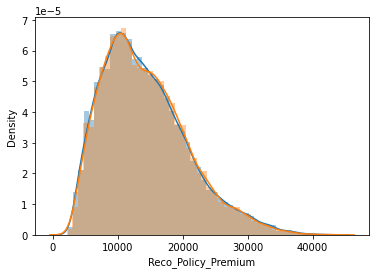

In [ ]:
sns.distplot(train_data['Reco_Policy_Premium'])
sns.distplot(test_data['Reco_Policy_Premium'])

In [ ]:
train_data.shape , test_data.shape

((50882, 19), (21805, 18))

### create New Features from Premium and Region Code

In [ ]:
all_data = pd.concat([train_data, test_data],axis=0)
all_data.index = range(0,len(all_data))
all_data.iloc[50880:50890,:]

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower
50880,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1.0,0,0,0,0,0,22
50881,C3,3866,Rented,Individual,24,24,No,X3,2.0,3.0,18,11424.0,0.0,0,0,0,0,0,0
50882,C1,156,Owned,Individual,30,30,No,UNK,6.0,3.0,5,11934.0,NaN,0,0,1,0,0,0
50883,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,NaN,0,0,0,0,0,1
50884,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0,NaN,0,0,0,0,0,0
50885,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0,NaN,0,0,0,0,0,0
50886,C1,951,Owned,Individual,75,75,No,X3,-1.0,-1.0,5,22534.0,NaN,1,1,0,1,0,0
50887,C1,1329,Rented,Individual,24,24,No,X2,-1.0,-1.0,18,6150.0,NaN,1,1,0,1,0,0
50888,C2,3479,Owned,Individual,56,56,No,X5,99.0,4.0,17,19152.0,NaN,0,0,0,0,0,0
50889,C13,396,Rented,Individual,41,41,No,UNK,-1.0,-1.0,16,11034.0,NaN,1,1,1,1,1,0


In [ ]:
print(all_data.shape)

(72687, 19)


### MAKE Whole Number 

In [ ]:
def make_whole_number(data):
  _data = str(int(data))
  _len_data = len(_data)
  _data = "".join(_data[0] + '0' * (_len_data-1))
  return int(_data)

In [ ]:
for fe in ['Region_Code','Reco_Policy_Premium']:
  all_data[fe+"___WHOLE_NUMBER"] = all_data[fe].apply(make_whole_number)

all_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000


### Binning Numerical Features

In [ ]:
def create_bin_features(input_df, features):
    for bin_fe in features:
        print("Binning: ",bin_fe)
        input_df[bin_fe+"___BINS"] = pd.qcut(input_df[bin_fe], 10, labels=False, duplicates='drop')
    
    return input_df

In [ ]:
binning_num_features = ['Region_Code','Reco_Policy_Premium']
all_data = create_bin_features(all_data, binning_num_features)
all_data.head()

Binning:  Region_Code
Binning:  Reco_Policy_Premium


,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


### Outlier Treatment

In [ ]:
def outlier_treatement(input_demo, features):
    
    for fe in features:
        
        #CLIPPING MonthlyIncome and finding outliers
        Q1 = input_demo[fe].quantile(.25)
        Q3 = input_demo[fe].quantile(.75)
        Q_10 = input_demo[fe].quantile(0.1)
        Q_90 = input_demo[fe].quantile(0.9)

        IQR = Q3-Q1

        low_lim = Q1 - (IQR*1.5)
        high_lim = Q3 + (IQR*1.5)
        print(low_lim, high_lim)
        input_demo[fe+"___OUTLIERS"] = input_demo[fe].apply(lambda x: x<low_lim and x>high_lim)
#         input_demo[fe] = input_demo[fe].clip(Q_10, Q_90)
    
    return input_demo

In [ ]:
all_data = outlier_treatement(all_data, ['Region_Code','Reco_Policy_Premium','Upper_Age'])
all_data.head()

-2704.0 5912.0
-4081.0 31479.0
-18.5 105.5


,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS,Region_Code___OUTLIERS,Reco_Policy_Premium___OUTLIERS,Upper_Age___OUTLIERS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4,False,False,False
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9,False,False,False
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1,False,False,False
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7,False,False,False
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3,False,False,False


In [ ]:
all_data = all_data.drop(['Region_Code___OUTLIERS','Reco_Policy_Premium___OUTLIERS','Upper_Age___OUTLIERS'],axis=1)
all_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data.shape

(72687, 23)

In [ ]:
len(train_data)

50882

In [ ]:
all_data_og = all_data.copy()
all_data_og.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data_og.to_csv('All_data_Combined_New_Features_Without_Outliers.csv',index=False)

In [ ]:
all_data = pd.get_dummies(all_data,drop_first=True)
all_data.head()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,3213,36,36,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,1117,75,22,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,3732,32,32,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4378,52,48,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,2190,44,44,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))
print(train_data_final.shape)
print(test_data_final.shape)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,3213,36,36,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,1117,75,22,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,156,30,30,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,69,68,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0


(50882, 65)
(21805, 64)


#### Model Training - One hot Encoding

In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

print(X.shape)
print(y.shape)

(50882, 64)
(50882,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40705, 64) (10177, 64) (40705,) (10177,)


In [ ]:
#creating a dictionary of the models(estimators) 
estimators = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Support Vector Regression':[SVC()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=1000)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators, X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression fitted
KNN fitted
Decision Tree fitted
Support Vector Regression fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


In [ ]:
#applying the fitted models to the test dataset
def mpredict(estimators, X_test, y_test):
    outcome = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome

outcome = mpredict(estimators, X_test, y_test)

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome[m][0],4))
    print('Accuracy Score', round(outcome[m][1],4))
    print('Classification report \n ')
    print(outcome[m][2])
    print('\n')

------------------------Logistic Regression------------------------
F1 Score 0.4301
Accuracy Score 0.7548
Classification report 
 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7682
           1       0.00      0.00      0.00      2495

    accuracy                           0.75     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.75      0.65     10177



------------------------KNN------------------------
F1 Score 0.4847
Accuracy Score 0.71
Classification report 
 
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      7682
           1       0.26      0.10      0.14      2495

    accuracy                           0.71     10177
   macro avg       0.51      0.50      0.48     10177
weighted avg       0.63      0.71      0.66     10177



------------------------Decision Tree------------------------
F1 Score 0.5548
Accuracy Score 0.669

In [ ]:
print(metrics.roc_auc_score(y_test, estimators['Cat Boost'][0].predict_proba(X_test)[:, 1]))

0.6096865952681202


In [ ]:
all_data_og.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data = all_data_og.copy()
all_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)

In [ ]:
all_data = pd.get_dummies(all_data,drop_first=True)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#creating a dictionary of the models(estimators) 
estimators = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Support Vector Regression':[SVC()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=1000)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators, X_train, y_train)

#applying the fitted models to the test dataset
def mpredict(estimators, X_test, y_test):
    outcome = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome

outcome = mpredict(estimators, X_test, y_test)

for m in outcome:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome[m][0],4))
    print('Accuracy Score', round(outcome[m][1],4))
    print('Classification report \n ')
    print(outcome[m][2])
    print('\n')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(40705, 62) (10177, 62) (40705,) (10177,)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression fitted
KNN fitted
Decision Tree fitted
Support Vector Regression fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


------------------------Logistic Regression------------------------
F1 Score 0.4301
Accuracy Score 0.7548
Classification report 
 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7682
           1       0.00      0.00      0.00      2495

    accuracy                           0.75     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.75      0.65     10177



------------------------KNN------------------------
F1 Score 0.4839
Accuracy Score 0.7075
Classification report 
 
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      7682
           1       0.26      0.10      0.14      2495

    accuracy                           0.71     10177
   macro avg       0.51      0.50      0.48     10177
weighted avg       0.63      0.71      0.66     10177



------------------------Decision Tree------------------------
F1 Score 0.5479
Accuracy Score 0.6

In [ ]:
print(metrics.roc_auc_score(y_test, estimators['KNN'][0].predict_proba(X_test)[:, 1]))

0.5105693031467777


### Categorical Encoding 

In [ ]:
all_data = all_data_og.copy()
all_data.shape

(72687, 23)

In [ ]:
all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,Rented,Individual,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,C5,Owned,Joint,75,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C1,Owned,Individual,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4
1,C4,Owned,Joint,69,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  mean_ordinal = train_data_final.groupby([fe])['Response'].mean().to_dict()
  train_data_final[fe]=train_data_final[fe].map(mean_ordinal)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
train_data_final.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.237472,0.237495,0.237813,36,0.239213,0.244120,99.0,3.0,0.328385,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,0.230205,0.241959,0.248309,75,0.239213,0.241096,-1.0,-1.0,0.328385,30510.0,0,1,1,0,1,0,53,1000,30000,4,9
2,0.230205,0.241959,0.237813,32,0.239213,0.234197,1.0,1.0,0.276969,7450.0,1,0,0,1,0,0,0,3000,7000,8,1
3,0.235081,0.241959,0.248309,52,0.239213,0.244120,99.0,3.0,0.276969,17780.0,0,0,0,0,0,0,4,4000,10000,9,7
4,0.241971,0.237495,0.237813,44,0.239213,0.241096,3.0,1.0,0.223555,10404.0,0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
print(X.shape,y.shape)

(50882, 20) (50882,)


K fold Cross Validation

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=100)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.64011218, 0.64142907, 0.65143992, 0.66512712, 0.65590754,
       0.65656748, 0.63646104, 0.65509906, 0.64258556, 0.65134345])

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.650 (0.009)


### Probability Ratio Encoding

In [ ]:
all_data = all_data_og.copy()
all_data.shape

(72687, 23)

In [ ]:
all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,Rented,Individual,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,C5,Owned,Joint,75,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C1,Owned,Individual,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4
1,C4,Owned,Joint,69,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  prob_df = train_data_final.groupby([fe])['Response'].mean()
  prob_df = pd.DataFrame(prob_df)
  prob_df['Not_Response'] = 1-prob_df['Response']
  prob_df['Probability_ratio']=prob_df['Response']/prob_df['Not_Response']
  probability_encoding = prob_df['Probability_ratio'].to_dict()
  train_data_final[fe]=train_data_final[fe].map(probability_encoding)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
print(X.shape,y.shape)

(50882, 20) (50882,)


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.65987311, 0.66372922, 0.66133377, 0.67469429, 0.66768103,
       0.66352345, 0.64659928, 0.66551867, 0.65314958, 0.65826157])

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.661 (0.007)


In [ ]:
train_data_final.head() 

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.311427,0.311467,0.312015,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,0.299048,0.319190,0.330333,75,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,0,1,1,0,1,0,53,1000,30000,4,9
2,0.299048,0.319190,0.312015,32,0.314429,0.305819,1.0,1.0,0.383066,7450.0,1,0,0,1,0,0,0,3000,7000,8,1
3,0.307329,0.319190,0.330333,52,0.314429,0.322961,99.0,3.0,0.383066,17780.0,0,0,0,0,0,0,4,4000,10000,9,7
4,0.319211,0.311467,0.312015,44,0.314429,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,0,0,0,0,2000,10000,6,3


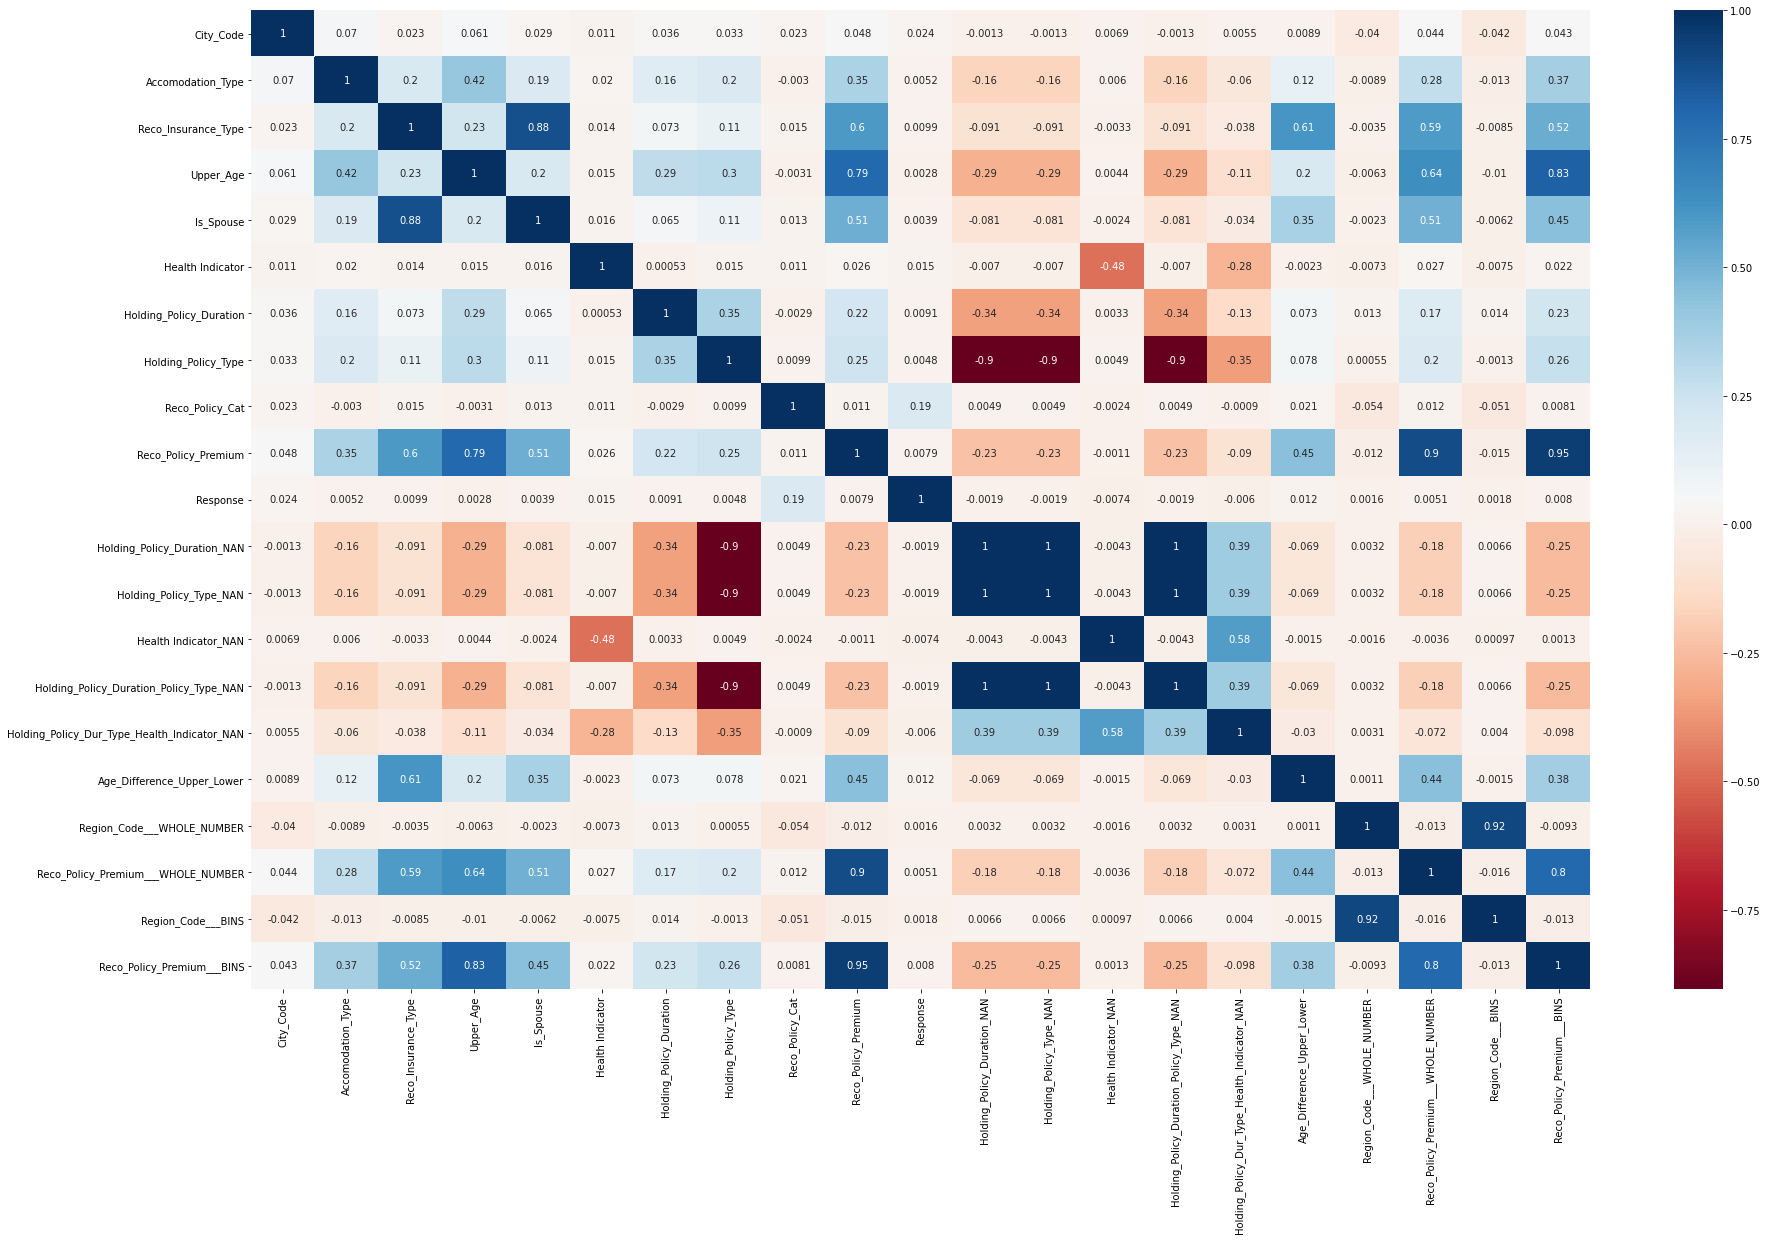

In [ ]:
dataset = train_data_final.copy()
plt.figure(figsize=(30, 18))
sns.heatmap(dataset.corr(),annot=True,cmap='RdBu')
plt.show()

In [ ]:
dataset_only_independent = dataset.copy()
dataset_only_independent = dataset_only_independent.drop(['Response'],axis=1)
dataset_only_independent.head(2)

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.311427,0.311467,0.312015,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,0.299048,0.319190,0.330333,75,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,1,1,0,1,0,53,1000,30000,4,9


In [ ]:
def high_correlation_train_set_indpendent(dataset,threshold):
    col_corr = set() #Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # It also consider -ve corr - You can remove abs() - If you dont wont to consider -ve corr
            if abs(corr_matrix.iloc[i,j]) > threshold: 
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

### These function return correlated features which are to be removed , Becaause they are correlated with any other feature

In [ ]:
corr_features = high_correlation_train_set_indpendent(dataset_only_independent,0.8)
corr_features

{'Holding_Policy_Duration_NAN',
 'Holding_Policy_Duration_Policy_Type_NAN',
 'Holding_Policy_Type_NAN',
 'Is_Spouse',
 'Reco_Policy_Premium___BINS',
 'Reco_Policy_Premium___WHOLE_NUMBER',
 'Region_Code___BINS'}

### Extra trees Classifier

In [ ]:
y_og_values = dataset['Response']
y_og_values.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

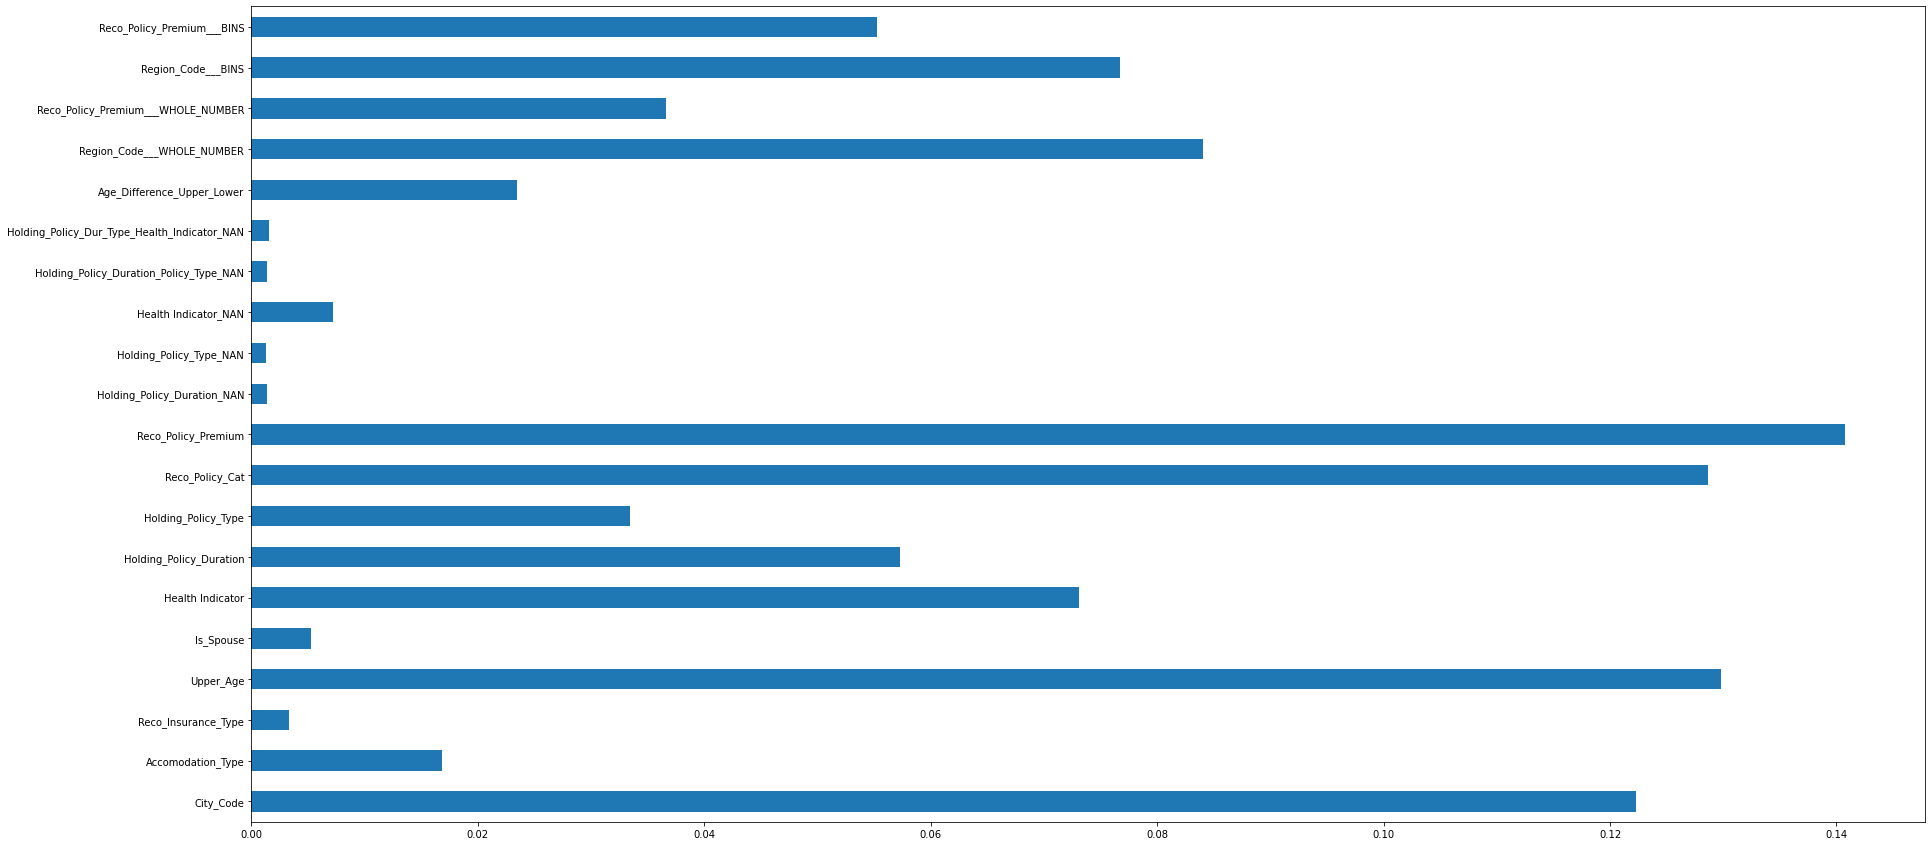

In [ ]:
model_feature_Selection = ExtraTreesClassifier()
model_feature_Selection.fit(dataset_only_independent,y_og_values)
feat_importances = pd.Series(model_feature_Selection.feature_importances_, index=dataset_only_independent.columns)
fig=plt.figure(figsize=[30,15])
feat_importances.plot(kind='barh')
plt.show()

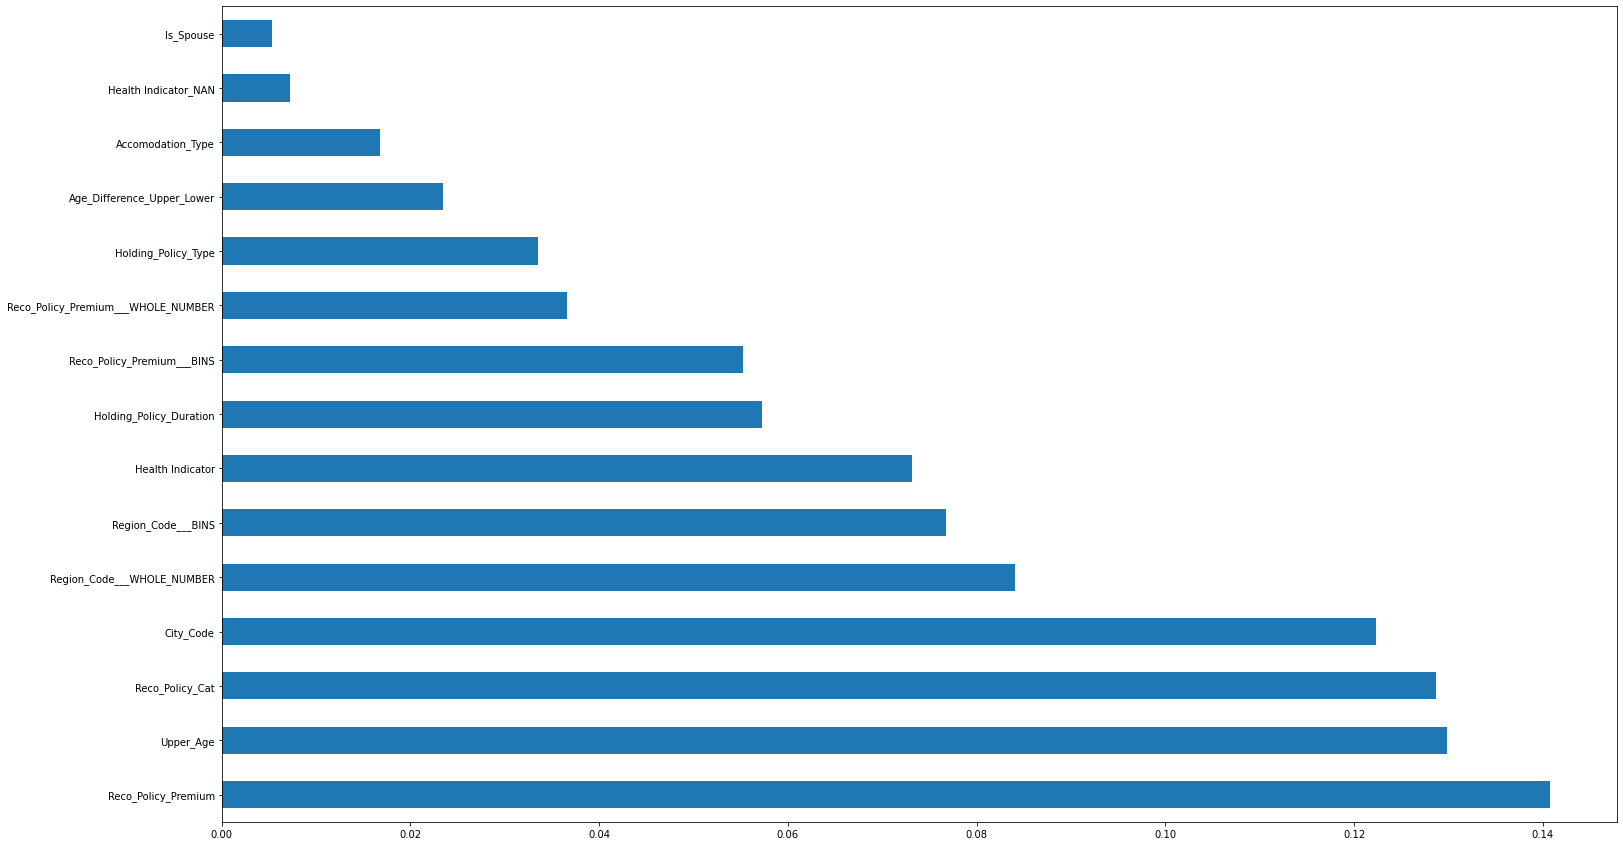

In [ ]:
feat_importances = pd.Series(model_feature_Selection.feature_importances_, index=dataset_only_independent.columns)
fig=plt.figure(figsize=[25,15])
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
imp_features_for_model = list(feat_importances.nlargest(15).index)
imp_features_for_model

['Reco_Policy_Premium',
 'Upper_Age',
 'Reco_Policy_Cat',
 'City_Code',
 'Region_Code___WHOLE_NUMBER',
 'Region_Code___BINS',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Reco_Policy_Premium___BINS',
 'Reco_Policy_Premium___WHOLE_NUMBER',
 'Holding_Policy_Type',
 'Age_Difference_Upper_Lower',
 'Accomodation_Type',
 'Health Indicator_NAN',
 'Is_Spouse']

In [ ]:
train_new_imp_features = train_data_final[['Response']+imp_features_for_model]
train_new_imp_features.head()

,Response,Reco_Policy_Premium,Upper_Age,Reco_Policy_Cat,City_Code,Region_Code___WHOLE_NUMBER,Region_Code___BINS,Health Indicator,Holding_Policy_Duration,Reco_Policy_Premium___BINS,Reco_Policy_Premium___WHOLE_NUMBER,Holding_Policy_Type,Age_Difference_Upper_Lower,Accomodation_Type,Health Indicator_NAN,Is_Spouse
0,0,11628.0,36,0.488949,0.311427,3000,8,0.322961,99.0,4,10000,3.0,0,0.311467,0,0.314429
1,0,30510.0,75,0.488949,0.299048,1000,4,0.317689,-1.0,9,30000,-1.0,53,0.319190,0,0.314429
2,1,7450.0,32,0.383066,0.299048,3000,8,0.305819,1.0,1,7000,1.0,0,0.319190,1,0.314429
3,0,17780.0,52,0.383066,0.307329,4000,9,0.322961,99.0,7,10000,3.0,4,0.319190,0,0.314429
4,0,10404.0,44,0.287922,0.319211,2000,6,0.317689,3.0,3,10000,1.0,0,0.311467,0,0.314429


In [ ]:
y = train_new_imp_features['Response']
X = train_new_imp_features.drop('Response',axis=1)
print(X.shape,y.shape)

(50882, 15) (50882,)


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.65806068, 0.66134729, 0.66237091, 0.67842576, 0.66754008,
       0.66968642, 0.64581984, 0.66868854, 0.64835055, 0.66008736])

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.662 (0.009)


#### Target Guided Mean Ordinal Encoding

In [ ]:
all_data_og.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data = all_data_og.copy()
all_data.shape

(72687, 23)

In [ ]:
all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,Rented,Individual,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,C5,Owned,Joint,75,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C1,Owned,Individual,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4
1,C4,Owned,Joint,69,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  ordinal_labels = train_data_final.groupby([fe])['Response'].mean().sort_values().index
  ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,1)}
  train_data_final[fe]=train_data_final[fe].map(ordinal_labels2)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
X.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,20,1,1,36,1,9,99.0,3.0,21,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,10,2,2,75,1,7,-1.0,-1.0,21,30510.0,1,1,0,1,0,53,1000,30000,4,9
2,10,2,1,32,1,3,1.0,1.0,17,7450.0,0,0,1,0,0,0,3000,7000,8,1
3,14,2,2,52,1,9,99.0,3.0,17,17780.0,0,0,0,0,0,4,4000,10000,9,7
4,23,1,1,44,1,7,3.0,1.0,13,10404.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
print(X.shape,y.shape)

(50882, 20) (50882,)


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.65987311, 0.66372922, 0.66133377, 0.67469429, 0.66768103,
       0.66352345, 0.64659928, 0.66551867, 0.65314958, 0.65826157])

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.661 (0.007)


### Submission

In [ ]:
all_data_og.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data = all_data_og.copy()
all_data.shape

(72687, 23)

In [ ]:
all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,Rented,Individual,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,C5,Owned,Joint,75,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C1,Owned,Individual,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4
1,C4,Owned,Joint,69,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  ordinal_labels = train_data_final.groupby([fe])['Response'].mean().sort_values().index
  ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,1)}
  train_data_final[fe]=train_data_final[fe].map(ordinal_labels2)
  test_data_final[fe]=test_data_final[fe].map(ordinal_labels2)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
X.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,20,1,1,36,1,9,99.0,3.0,21,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,10,2,2,75,1,7,-1.0,-1.0,21,30510.0,1,1,0,1,0,53,1000,30000,4,9
2,10,2,1,32,1,3,1.0,1.0,17,7450.0,0,0,1,0,0,0,3000,7000,8,1
3,14,2,2,52,1,9,99.0,3.0,17,17780.0,0,0,0,0,0,4,4000,10000,9,7
4,23,1,1,44,1,7,3.0,1.0,13,10404.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
test_data_final.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,27,2,1,30,1,3,6.0,3.0,18,11934.0,0,0,1,0,0,0,100,10000,1,4
1,24,2,2,69,2,9,3.0,3.0,12,32204.8,0,0,0,0,0,1,7,30000,0,9
2,27,1,1,28,1,5,2.0,4.0,19,9240.0,0,0,0,0,0,0,500,9000,2,2
3,20,1,1,23,1,5,3.0,3.0,12,9086.0,0,0,0,0,0,0,1000,9000,4,2
4,27,2,1,75,1,5,-1.0,-1.0,18,22534.0,1,1,0,1,0,0,900,20000,3,8


In [ ]:
print(X.shape,test_data_final.shape)

(50882, 20) (21805, 20)


In [ ]:
test_data_final.shape

(21805, 20)

In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_data_final)

In [ ]:
model_cat_final_submit = CatBoostClassifier(verbose=0, n_estimators=1000)
model_cat_final_submit = model_cat_final_submit.fit(X_st,y)

y_pred = model_cat_final_submit.predict(test_final_st)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
submission_df['Response'] = list(y_pred)
sub = submission_df[['ID','Response']]
sub.head(10)

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
5,50888,0
6,50889,0
7,50890,0
8,50891,0
9,50892,0


In [ ]:
sub['Response'].value_counts()

0    21395
1      410
Name: Response, dtype: int64

In [ ]:
sub.to_csv('Day2_submit_Cat_Updated_Features.csv',index=False)

### Probability Ratio Encoding

In [ ]:
all_data = all_data_og.copy()
all_data.shape

(72687, 23)

In [ ]:
all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,Rented,Individual,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,C5,Owned,Joint,75,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C1,Owned,Individual,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4
1,C4,Owned,Joint,69,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  prob_df = train_data_final.groupby([fe])['Response'].mean()
  prob_df = pd.DataFrame(prob_df)
  prob_df['Not_Response'] = 1-prob_df['Response']
  prob_df['Probability_ratio']=prob_df['Response']/prob_df['Not_Response']
  probability_encoding = prob_df['Probability_ratio'].to_dict()
  train_data_final[fe]=train_data_final[fe].map(probability_encoding)
  test_data_final[fe]=test_data_final[fe].map(probability_encoding)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
X.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.311427,0.311467,0.312015,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,0.299048,0.319190,0.330333,75,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,1,1,0,1,0,53,1000,30000,4,9
2,0.299048,0.319190,0.312015,32,0.314429,0.305819,1.0,1.0,0.383066,7450.0,0,0,1,0,0,0,3000,7000,8,1
3,0.307329,0.319190,0.330333,52,0.314429,0.322961,99.0,3.0,0.383066,17780.0,0,0,0,0,0,4,4000,10000,9,7
4,0.319211,0.311467,0.312015,44,0.314429,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
test_data_final.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.326386,0.319190,0.312015,30,0.314429,0.305819,6.0,3.0,0.410364,11934.0,0,0,1,0,0,0,100,10000,1,4
1,0.319554,0.319190,0.330333,69,0.322135,0.322961,3.0,3.0,0.283041,32204.8,0,0,0,0,0,1,7,30000,0,9
2,0.326386,0.311467,0.312015,28,0.314429,0.309704,2.0,4.0,0.425427,9240.0,0,0,0,0,0,0,500,9000,2,2
3,0.311427,0.311467,0.312015,23,0.314429,0.309704,3.0,3.0,0.283041,9086.0,0,0,0,0,0,0,1000,9000,4,2
4,0.326386,0.319190,0.312015,75,0.314429,0.309704,-1.0,-1.0,0.410364,22534.0,1,1,0,1,0,0,900,20000,3,8


In [ ]:
print(X.shape,test_data_final.shape)

(50882, 20) (21805, 20)


In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_data_final)

In [ ]:
model_cat_final_submit = CatBoostClassifier(verbose=0, n_estimators=1000)
model_cat_final_submit = model_cat_final_submit.fit(X_st,y)

y_pred = model_cat_final_submit.predict(test_final_st)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
submission_df['Response'] = list(y_pred)
sub = submission_df[['ID','Response']]
sub.head(10)

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
5,50888,0
6,50889,0
7,50890,0
8,50891,0
9,50892,0


In [ ]:
sub['Response'].value_counts()

0    21395
1      410
Name: Response, dtype: int64

In [ ]:
sub.to_csv('Day2_submit_Cat_Updated_Features1.csv',index=False)

#### New Approach

In [ ]:
all_data = all_data_og.copy()
all_data.shape

(72687, 23)

In [ ]:
all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,Rented,Individual,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,C5,Owned,Joint,75,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C1,Owned,Individual,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4
1,C4,Owned,Joint,69,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  prob_df = train_data_final.groupby([fe])['Response'].mean()
  prob_df = pd.DataFrame(prob_df)
  prob_df['Not_Response'] = 1-prob_df['Response']
  prob_df['Probability_ratio']=prob_df['Response']/prob_df['Not_Response']
  probability_encoding = prob_df['Probability_ratio'].to_dict()
  train_data_final[fe]=train_data_final[fe].map(probability_encoding)
  test_data_final[fe]=test_data_final[fe].map(probability_encoding)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40705, 20) (10177, 20) (40705,) (10177,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu',input_dim = 20))

# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform',activation='sigmoid'))

# Compiling the ANN
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 3,676
Trainable params: 3,676
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train_st, y_train,validation_split=0.20, batch_size = 10, epochs = 20)

Epoch 1/20
3257/3257 [==============================] - 7s 2ms/step - loss: 0.5472 - accuracy: 0.7572 - val_loss: 0.5330 - val_accuracy: 0.7585
Epoch 2/20
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5289 - accuracy: 0.7606 - val_loss: 0.5329 - val_accuracy: 0.7586
Epoch 3/20
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5307 - accuracy: 0.7584 - val_loss: 0.5336 - val_accuracy: 0.7581
Epoch 4/20
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5228 - accuracy: 0.7634 - val_loss: 0.5326 - val_accuracy: 0.7589
Epoch 5/20
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5298 - accuracy: 0.7592 - val_loss: 0.5311 - val_accuracy: 0.7590
Epoch 6/20
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5196 - accuracy: 0.7644 - val_loss: 0.5339 - val_accuracy: 0.7575
Epoch 7/20
3257/3257 [==============================] - 5s 2ms/step - loss: 0.5206 - accuracy: 0.7642 - val_loss: 0.5325 - val_accuracy:

In [ ]:
y_pred = classifier.predict(X_test_st)
y_pred_final = np.argmax(y_pred,axis=1)
print('------------------------ANN MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred_final,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred_final))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred_final))
print('\n')

------------------------ANN MODEL------------------------
F1 Score 0.43014726468447284
Accuracy Score 0.7548393436179621
Classification report 
 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7682
           1       0.00      0.00      0.00      2495

    accuracy                           0.75     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.75      0.65     10177





Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
X.shape

(50882, 20)

In [ ]:
y.shape

(50882,)

In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X)

ERROR: Could not find a version that satisfies the requirement bayes_opt (from versions: none)
ERROR: No matching distribution found for bayes_opt


In [ ]:
import lightgbm as lgb
#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=1)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X_train_st, y, init_round=8, opt_round=10, n_folds=4, random_seed=1,n_estimators=5000)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.6437   |  0.8834   |  0.6763   |  0.01011  |  41.16    |  8.669    |  25.54    |  18.63    |  43.35    |  0.4028   |
|  2        |  0.6321   |  0.9078   |  0.4354   |  0.6884   |  34.31    |  26.95    |  21.64    |  67.05    |  47.37    |  0.5631   |
|  3        |  0.6289   |  0.8281   |  0.2585   |  0.8027   |  87.78    |  12.84    |  61.54    |  87.64    |  74.1     |  0.09419  |
|  4        |  0.6242   |  0.8078   |  0.2359   |  0.8794   |  26.88    |  15.53    |  77.47    |  53.32    |  62.75    |  0.3224   |
|  5        |  0.6454   |  0.9373   |  0.7677   |  0.02811  |  72.51    |  29.72    |  64.89    |  28.04    |  68.2     |  0.1122   |
|  6        |  0.642    |  0.8896   |  0.8269   |  0.3007   | 

In [ ]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.9373001855363168,
 'boost_from_average': False,
 'feature_fraction': 0.7677005375178984,
 'is_unbalance': True,
 'learning_rate': 0.02810539457074989,
 'max_bin': 73,
 'max_depth': 30,
 'metric': 'auc',
 'min_data_in_leaf': 65,
 'min_sum_hessian_in_leaf': 28.044399206440517,
 'num_leaves': 68,
 'objective': 'binary',
 'subsample': 0.1121937465118656}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40705, 20) (10177, 20) (40705,) (10177,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(X_train_st, label=y_train)

clf = lgb.train(opt_params,d_train,100)
y_pred = clf.predict(X_test_st)
y_pred_1 = [np.argmax(line) for line in y_pred]

In [ ]:
print('F1 Score', metrics.f1_score(y_test,y_pred_1,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred_1))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred_1))
print('\n')

F1 Score 0.43014726468447284
Accuracy Score 0.7548393436179621
Classification report 
 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7682
           1       0.00      0.00      0.00      2495

    accuracy                           0.75     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.75      0.65     10177





Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


#### Threshold Value

In [ ]:
X_train.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
47066,0.319211,0.319190,0.312015,57,0.314429,0.322961,-1.0,-1.0,0.283041,13002.0,1,1,0,1,0,0,1000,10000,5,4
20805,0.323369,0.319190,0.312015,52,0.314429,0.462687,99.0,4.0,0.425427,13032.0,0,0,0,0,0,0,2000,10000,6,4
4665,0.311427,0.319190,0.312015,68,0.314429,0.317689,99.0,1.0,0.152736,24786.0,0,0,0,0,0,0,1000,20000,5,9
29340,0.326386,0.311467,0.312015,49,0.314429,0.305819,4.0,3.0,0.410364,16608.0,0,0,1,0,0,0,400,10000,2,6
8285,0.311427,0.319190,0.330333,44,0.322135,0.309325,6.0,2.0,0.342205,24464.0,0,0,0,0,0,6,2000,20000,7,9


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
ytrain_pred = rf_model.predict_proba(X_train)
## 0th Column = Probability of Having 0 , 1st Column = Probability of Having 1 in _pred()
print('RF train roc-auc : {} '.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc : {} '.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc : 0.9999999950173823 
RF test roc-auc : 0.6212711024757143 


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train,y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
## 0th Column = Probability of Having 0 , 1st Column = Probability of Having 1 in _pred()
print('AdaBoost train roc-auc : {} '.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('AdaBoost test roc-auc : {} '.format(roc_auc_score(y_test,ytest_pred[:,1])))

AdaBoost train roc-auc : 0.6336814216660044 
AdaBoost test roc-auc : 0.6184026214365728 


In [ ]:
lgb=LGBMClassifier()
lgb.fit(X_train,y_train)
ytrain_pred = lgb.predict_proba(X_train)
## 0th Column = Probability of Having 0 , 1st Column = Probability of Having 1 in _pred()
print('AdaBoost train roc-auc : {} '.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = lgb.predict_proba(X_test)
print('AdaBoost test roc-auc : {} '.format(roc_auc_score(y_test,ytest_pred[:,1])))

AdaBoost train roc-auc : 0.7512517398719841 
AdaBoost test roc-auc : 0.6546319402668914 


In [ ]:
cat=CatBoostClassifier()
cat.fit(X_train,y_train)
ytrain_pred = cat.predict_proba(X_train)
## 0th Column = Probability of Having 0 , 1st Column = Probability of Having 1 in _pred()
print('AdaBoost train roc-auc : {} '.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = cat.predict_proba(X_test)
print('AdaBoost test roc-auc : {} '.format(roc_auc_score(y_test,ytest_pred[:,1])))

Learning rate set to 0.050148
0:	learn: 0.6766807	total: 27.5ms	remaining: 27.5s
1:	learn: 0.6601488	total: 48.4ms	remaining: 24.1s
2:	learn: 0.6464293	total: 68.3ms	remaining: 22.7s
3:	learn: 0.6352210	total: 87.6ms	remaining: 21.8s
4:	learn: 0.6241383	total: 109ms	remaining: 21.6s
5:	learn: 0.6146249	total: 126ms	remaining: 20.9s
6:	learn: 0.6056701	total: 144ms	remaining: 20.5s
7:	learn: 0.5981074	total: 166ms	remaining: 20.6s
8:	learn: 0.5906640	total: 189ms	remaining: 20.8s
9:	learn: 0.5843362	total: 214ms	remaining: 21.2s
10:	learn: 0.5779607	total: 236ms	remaining: 21.2s
11:	learn: 0.5728348	total: 255ms	remaining: 21s
12:	learn: 0.5687574	total: 276ms	remaining: 20.9s
13:	learn: 0.5645430	total: 297ms	remaining: 20.9s
14:	learn: 0.5610294	total: 320ms	remaining: 21s
15:	learn: 0.5564846	total: 341ms	remaining: 21s
16:	learn: 0.5535890	total: 363ms	remaining: 21s
17:	learn: 0.5510919	total: 384ms	remaining: 20.9s
18:	learn: 0.5489699	total: 404ms	remaining: 20.9s
19:	learn: 0.54

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
## 0th Column = Probability of Having 0 , 1st Column = Probability of Having 1 in _pred()
print('KNN train roc-auc : {} '.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc : {} '.format(roc_auc_score(y_test,ytest_pred[:,1])))

KNN train roc-auc : 0.7784684804285467 
KNN test roc-auc : 0.505992797884235 


In [ ]:
pred = []
for model in [ada_classifier,lgb,cat]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
    
### For Each Record - 4 models will give output - We will take mean of that value
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc 0.6562116683249342


In [ ]:
#### Calculate ROC Score
fpr,tpr,thresholds = roc_curve(y_test,final_prediction)
thresholds

array([1.68156142, 0.68156142, 0.66488986, ..., 0.16035979, 0.16035638,
       0.15818658])

In [ ]:
### From Above Threshold value we will select best one

from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)

accuracy_ls.columns=['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls.head()

,thresholds,accuracy
49,0.536136,0.755920
53,0.533869,0.755920
51,0.534902,0.755920
47,0.538018,0.755822
48,0.536451,0.755822


In [ ]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

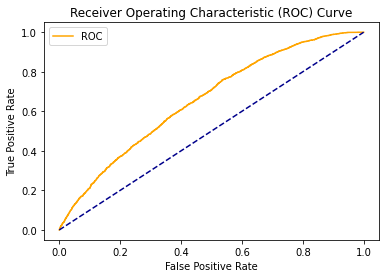

In [ ]:
plot_roc_curve(fpr,tpr)

### Feature Selection

In [ ]:
X.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.311427,0.311467,0.312015,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,0.299048,0.319190,0.330333,75,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,1,1,0,1,0,53,1000,30000,4,9
2,0.299048,0.319190,0.312015,32,0.314429,0.305819,1.0,1.0,0.383066,7450.0,0,0,1,0,0,0,3000,7000,8,1
3,0.307329,0.319190,0.330333,52,0.314429,0.322961,99.0,3.0,0.383066,17780.0,0,0,0,0,0,4,4000,10000,9,7
4,0.319211,0.311467,0.312015,44,0.314429,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
NumericData = X.copy()
NumericData

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.311427,0.311467,0.312015,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,0.299048,0.319190,0.330333,75,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,1,1,0,1,0,53,1000,30000,4,9
2,0.299048,0.319190,0.312015,32,0.314429,0.305819,1.0,1.0,0.383066,7450.0,0,0,1,0,0,0,3000,7000,8,1
3,0.307329,0.319190,0.330333,52,0.314429,0.322961,99.0,3.0,0.383066,17780.0,0,0,0,0,0,4,4000,10000,9,7
4,0.319211,0.311467,0.312015,44,0.314429,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,0,0,0,2000,10000,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,0.319554,0.311467,0.312015,22,0.314429,0.309704,-1.0,-1.0,0.283041,7704.0,1,1,0,1,0,0,800,7000,3,1
50878,0.299048,0.311467,0.312015,27,0.314429,0.309704,7.0,3.0,0.079787,5408.0,0,0,0,0,0,0,4000,5000,9,0
50879,0.326386,0.311467,0.312015,63,0.314429,0.317689,99.0,1.0,0.459933,11374.0,0,0,0,0,0,0,400,10000,2,3
50880,0.326386,0.319190,0.330333,71,0.314429,0.317689,2.0,2.0,0.287922,28179.2,0,0,0,0,0,22,4,20000,0,9


In [ ]:
#checking for presence onf multi-collieanrity
vif=pd.DataFrame()
vif['Features']=NumericData.columns
vif['VIF']=[variance_inflation_factor(NumericData.values,i) for i in range(NumericData.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
10,Holding_Policy_Duration_NAN,inf
13,Holding_Policy_Duration_Policy_Type_NAN,inf
11,Holding_Policy_Type_NAN,inf
4,Is_Spouse,24442.93
2,Reco_Insurance_Type,11962.71
1,Accomodation_Type,7086.25
5,Health Indicator,964.74
0,City_Code,319.49
9,Reco_Policy_Premium,171.49
19,Reco_Policy_Premium___BINS,54.18


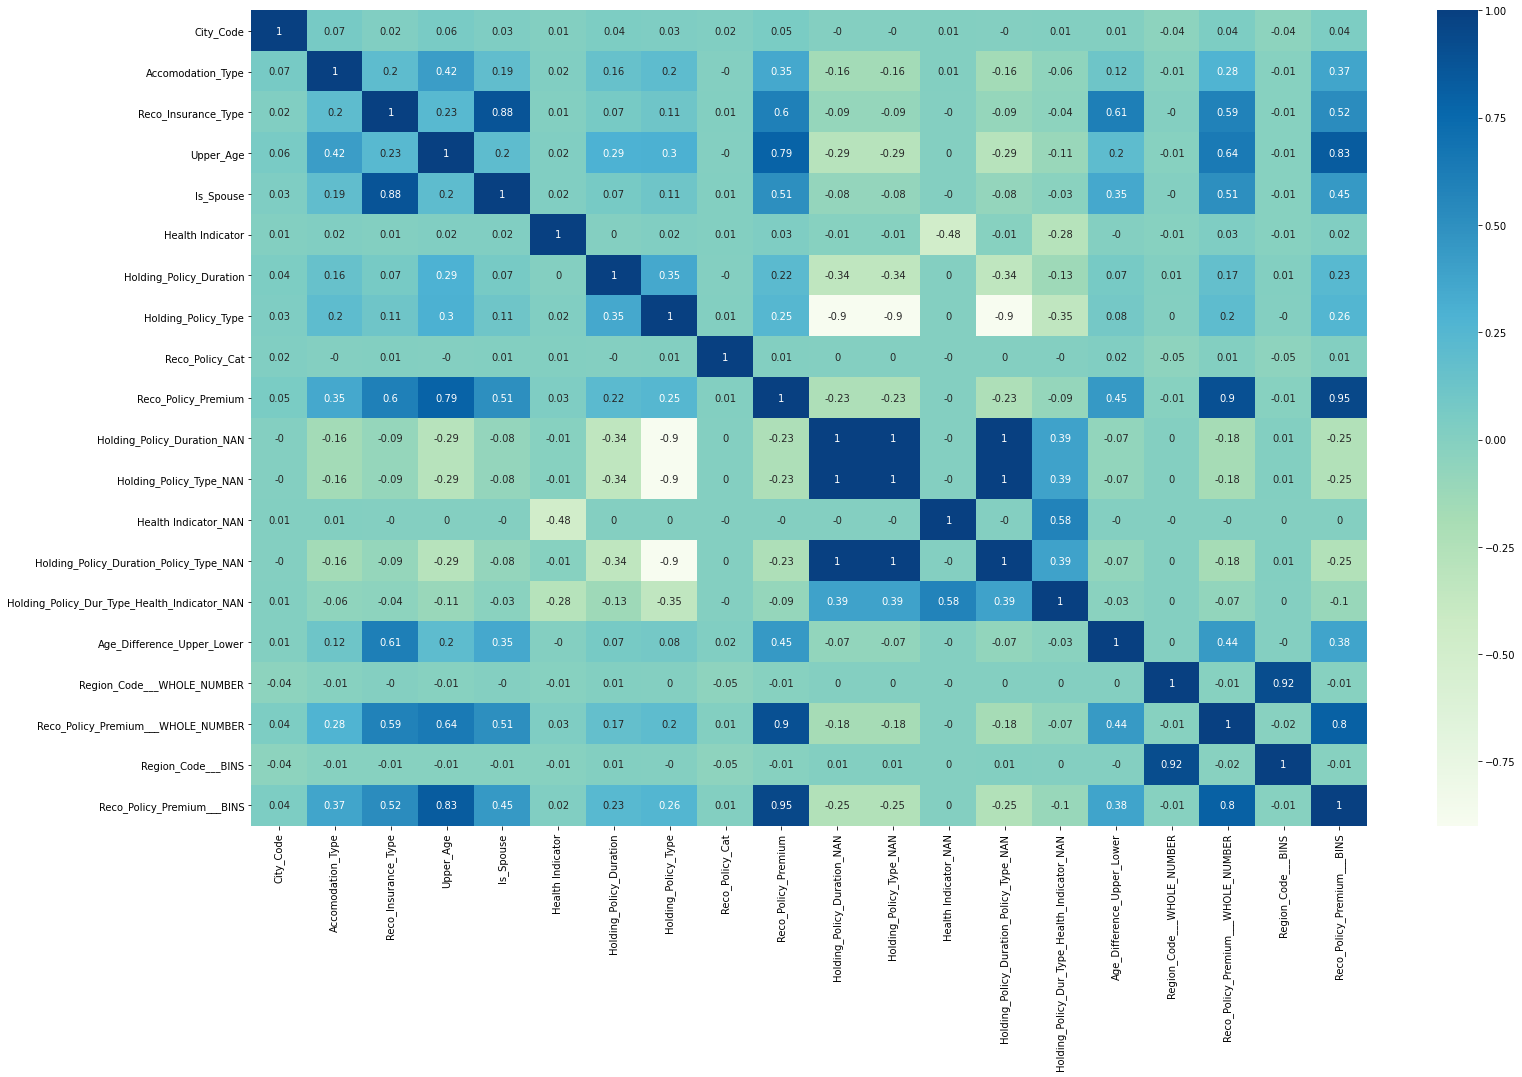

In [ ]:

plt.figure(figsize=(25,15))
sns.heatmap(round(NumericData.corr(method='pearson'),2),annot=True,mask=None,cmap='GnBu')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=55)

In [ ]:
var_thres=VarianceThreshold(threshold=0.05)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.05)

In [ ]:
### Finding non constant features
sum(var_thres.get_support())

14

In [ ]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

In [ ]:
constant_columns

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Reco_Policy_Cat']

In [ ]:
X_train.columns

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Holding_Policy_Duration_NAN', 'Holding_Policy_Type_NAN',
       'Health Indicator_NAN', 'Holding_Policy_Duration_Policy_Type_NAN',
       'Holding_Policy_Dur_Type_Health_Indicator_NAN',
       'Age_Difference_Upper_Lower', 'Region_Code___WHOLE_NUMBER',
       'Reco_Policy_Premium___WHOLE_NUMBER', 'Region_Code___BINS',
       'Reco_Policy_Premium___BINS'],
      dtype='object')

In [ ]:
X_train.drop(constant_columns,axis=1,inplace=True)
X_test.drop(constant_columns,axis=1,inplace=True)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(15265, 14)
(15265,)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(35617, 14)
(15265, 14)


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=100)
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.50709641, 0.49919102, 0.52460474, 0.50080587, 0.50852418,
       0.50800596, 0.50639646, 0.52971816, 0.51650507, 0.49581124])

In [ ]:
### method 4

In [ ]:
NumericData.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.311427,0.311467,0.312015,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,0.299048,0.319190,0.330333,75,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,1,1,0,1,0,53,1000,30000,4,9
2,0.299048,0.319190,0.312015,32,0.314429,0.305819,1.0,1.0,0.383066,7450.0,0,0,1,0,0,0,3000,7000,8,1
3,0.307329,0.319190,0.330333,52,0.314429,0.322961,99.0,3.0,0.383066,17780.0,0,0,0,0,0,4,4000,10000,9,7
4,0.319211,0.311467,0.312015,44,0.314429,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
print(NumericData.shape,y.shape)

(50882, 20) (50882,)


In [ ]:
#apply SelectKBest class to extract top 10 best features-above 99 features obtained
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(NumericData,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Specs','Score']  
#print 10 best features
print(featureScores.nlargest(15,'Score'))  

                                           Specs        Score
8                                Reco_Policy_Cat  1968.647157
0                                      City_Code    29.559389
5                               Health Indicator    10.709809
15                    Age_Difference_Upper_Lower     7.679177
2                            Reco_Insurance_Type     4.978498
6                        Holding_Policy_Duration     4.254494
19                    Reco_Policy_Premium___BINS     3.266643
9                            Reco_Policy_Premium     3.210601
12                          Health Indicator_NAN     2.751849
14  Holding_Policy_Dur_Type_Health_Indicator_NAN     1.857433
1                              Accomodation_Type     1.376414
17            Reco_Policy_Premium___WHOLE_NUMBER     1.335338
7                            Holding_Policy_Type     1.172858
4                                      Is_Spouse     0.757694
3                                      Upper_Age     0.391031


In [ ]:
## method 5

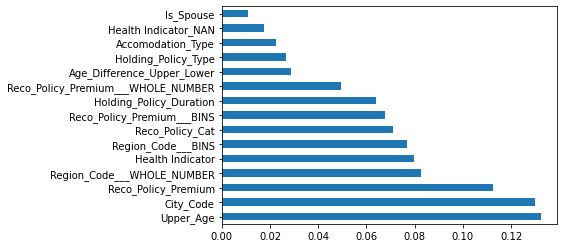

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(NumericData,y)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
feat_importances.nlargest(15)

Upper_Age                             0.132201
City_Code                             0.129938
Reco_Policy_Premium                   0.112350
Region_Code___WHOLE_NUMBER            0.082803
Health Indicator                      0.079679
Region_Code___BINS                    0.076651
Reco_Policy_Cat                       0.070881
Reco_Policy_Premium___BINS            0.067889
Holding_Policy_Duration               0.063875
Reco_Policy_Premium___WHOLE_NUMBER    0.049527
Age_Difference_Upper_Lower            0.028581
Holding_Policy_Type                   0.026726
Accomodation_Type                     0.022424
Health Indicator_NAN                  0.017466
Is_Spouse                             0.011054
dtype: float64

#### Submission of Files

In [ ]:
all_data_og = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/All_data_Combined_New_Features_Without_Outliers.csv')
all_data_og.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data = all_data_og.copy()
all_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,Rented,Individual,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,C5,Owned,Joint,75,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C1,Owned,Individual,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4
1,C4,Owned,Joint,69,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  prob_df = train_data_final.groupby([fe])['Response'].mean()
  prob_df = pd.DataFrame(prob_df)
  prob_df['Not_Response'] = 1-prob_df['Response']
  prob_df['Probability_ratio']=prob_df['Response']/prob_df['Not_Response']
  probability_encoding = prob_df['Probability_ratio'].to_dict()
  train_data_final[fe]=train_data_final[fe].map(probability_encoding)
  test_data_final[fe]=test_data_final[fe].map(probability_encoding)

In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
X.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.311427,0.311467,0.312015,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,0.299048,0.319190,0.330333,75,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,1,1,0,1,0,53,1000,30000,4,9
2,0.299048,0.319190,0.312015,32,0.314429,0.305819,1.0,1.0,0.383066,7450.0,0,0,1,0,0,0,3000,7000,8,1
3,0.307329,0.319190,0.330333,52,0.314429,0.322961,99.0,3.0,0.383066,17780.0,0,0,0,0,0,4,4000,10000,9,7
4,0.319211,0.311467,0.312015,44,0.314429,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
test_data_final.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.326386,0.319190,0.312015,30,0.314429,0.305819,6.0,3.0,0.410364,11934.0,0,0,1,0,0,0,100,10000,1,4
1,0.319554,0.319190,0.330333,69,0.322135,0.322961,3.0,3.0,0.283041,32204.8,0,0,0,0,0,1,7,30000,0,9
2,0.326386,0.311467,0.312015,28,0.314429,0.309704,2.0,4.0,0.425427,9240.0,0,0,0,0,0,0,500,9000,2,2
3,0.311427,0.311467,0.312015,23,0.314429,0.309704,3.0,3.0,0.283041,9086.0,0,0,0,0,0,0,1000,9000,4,2
4,0.326386,0.319190,0.312015,75,0.314429,0.309704,-1.0,-1.0,0.410364,22534.0,1,1,0,1,0,0,900,20000,3,8


In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_data_final)

In [ ]:
model_cat_final_submit = CatBoostClassifier(verbose=0, n_estimators=1000)
model_cat_final_submit = model_cat_final_submit.fit(X_st,y)

y_pred = model_cat_final_submit.predict_proba(test_final_st)[:,1]
y_pred

array([0.30414796, 0.20405121, 0.28017317, ..., 0.0079732 , 0.28147649,
       0.14822937])

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
submission_df['Response'] = list(y_pred)
sub = submission_df[['ID','Response']]
sub.head(10)

,ID,Response
0,50883,0.304148
1,50884,0.204051
2,50885,0.280173
3,50886,0.211779
4,50887,0.225242
5,50888,0.187499
6,50889,0.326833
7,50890,0.414715
8,50891,0.296775
9,50892,0.337726


In [ ]:
sub['Response'].value_counts()

0.167718    2
0.199894    2
0.175444    1
0.317827    1
0.148132    1
           ..
0.381086    1
0.234250    1
0.413265    1
0.304633    1
0.256151    1
Name: Response, Length: 21803, dtype: int64

In [ ]:
sub.to_csv('Day2_submit_Cat_Updated_Features2.csv',index=False)

#### Combined Model

In [ ]:
X.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.311427,0.311467,0.312015,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,0.299048,0.319190,0.330333,75,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,1,1,0,1,0,53,1000,30000,4,9
2,0.299048,0.319190,0.312015,32,0.314429,0.305819,1.0,1.0,0.383066,7450.0,0,0,1,0,0,0,3000,7000,8,1
3,0.307329,0.319190,0.330333,52,0.314429,0.322961,99.0,3.0,0.383066,17780.0,0,0,0,0,0,4,4000,10000,9,7
4,0.319211,0.311467,0.312015,44,0.314429,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_st,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
lgb=LGBMClassifier()
lgb.fit(X_st,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
cat=CatBoostClassifier()
cat.fit(X_st,y)

Learning rate set to 0.055162
0:	learn: 0.6753079	total: 24.3ms	remaining: 24.2s
1:	learn: 0.6582942	total: 49.6ms	remaining: 24.7s
2:	learn: 0.6429004	total: 74.3ms	remaining: 24.7s
3:	learn: 0.6298531	total: 99.6ms	remaining: 24.8s
4:	learn: 0.6187070	total: 124ms	remaining: 24.6s
5:	learn: 0.6085782	total: 148ms	remaining: 24.6s
6:	learn: 0.5988783	total: 173ms	remaining: 24.6s
7:	learn: 0.5912065	total: 203ms	remaining: 25.1s
8:	learn: 0.5843083	total: 227ms	remaining: 25s
9:	learn: 0.5777243	total: 252ms	remaining: 24.9s
10:	learn: 0.5724470	total: 276ms	remaining: 24.8s
11:	learn: 0.5676505	total: 302ms	remaining: 24.9s
12:	learn: 0.5638450	total: 329ms	remaining: 25s
13:	learn: 0.5600785	total: 354ms	remaining: 24.9s
14:	learn: 0.5568502	total: 377ms	remaining: 24.7s
15:	learn: 0.5539175	total: 399ms	remaining: 24.6s
16:	learn: 0.5512879	total: 428ms	remaining: 24.8s
17:	learn: 0.5488778	total: 454ms	remaining: 24.7s
18:	learn: 0.5467986	total: 479ms	remaining: 24.7s
19:	learn: 

In [ ]:
X.shape

(50882, 20)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_st,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = []
for model in [ada_classifier,lgb,cat]:
    pred.append(pd.Series(model.predict_proba(test_final_st)[:,1]))
    
### For Each Record - 4 models will give output - We will take mean of that value
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
final_prediction

0        0.359750
1        0.302659
2        0.357669
3        0.310791
4        0.320283
           ...   
21800    0.289717
21801    0.318297
21802    0.160976
21803    0.357587
21804    0.256904
Length: 21805, dtype: float64

In [ ]:
list(final_prediction)

[0.35975045383503557,
 0.3026586829113255,
 0.3576685683780622,
 0.3107907555129582,
 0.32028302331030856,
 0.2971813891970992,
 0.3761047198298047,
 0.39523415700970577,
 0.37090798998925223,
 0.3847438924595395,
 0.3442629049180132,
 0.3260011116887907,
 0.3414201479783285,
 0.3565837796954312,
 0.32245379371948035,
 0.33452387206992107,
 0.2964538736149005,
 0.33848150922932224,
 0.29050050890864987,
 0.31988790370024955,
 0.2842537059250302,
 0.3641264113793378,
 0.3634486558826009,
 0.22920692059035463,
 0.28212330203130453,
 0.32241590573809303,
 0.34342946923479056,
 0.4410766653331859,
 0.2688361069670749,
 0.3082494027879484,
 0.33504948858298617,
 0.3454679338936173,
 0.3529541975769881,
 0.28177393440229365,
 0.5179218427039047,
 0.39445586913134506,
 0.31755780518097315,
 0.31330649971492025,
 0.33224381458134505,
 0.3180072949917068,
 0.27196919480796733,
 0.30699891657376355,
 0.3309783671021515,
 0.3344200615689333,
 0.40506871922124227,
 0.3900201842950983,
 0.314310485

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
submission_df['Response'] = list(final_prediction)
sub = submission_df[['ID','Response']]
sub.head(10)

,ID,Response
0,50883,0.359750
1,50884,0.302659
2,50885,0.357669
3,50886,0.310791
4,50887,0.320283
5,50888,0.297181
6,50889,0.376105
7,50890,0.395234
8,50891,0.370908
9,50892,0.384744


In [ ]:
sub['Response'].value_counts()

0.282782    2
0.295588    2
0.286894    1
0.291574    1
0.347700    1
           ..
0.351481    1
0.231235    1
0.199278    1
0.310494    1
0.321812    1
Name: Response, Length: 21803, dtype: int64

In [ ]:
sub.to_csv('Day2_submit_Cat_Updated_Features3.csv',index=False)

#### Important Features 

In [ ]:
X.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.311427,0.311467,0.312015,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,0.299048,0.319190,0.330333,75,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,1,1,0,1,0,53,1000,30000,4,9
2,0.299048,0.319190,0.312015,32,0.314429,0.305819,1.0,1.0,0.383066,7450.0,0,0,1,0,0,0,3000,7000,8,1
3,0.307329,0.319190,0.330333,52,0.314429,0.322961,99.0,3.0,0.383066,17780.0,0,0,0,0,0,4,4000,10000,9,7
4,0.319211,0.311467,0.312015,44,0.314429,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_st,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_st,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
lgb=LGBMClassifier()
lgb.fit(X_st,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
cat=CatBoostClassifier()
cat.fit(X_st,y)

Learning rate set to 0.055162
0:	learn: 0.6753079	total: 24.8ms	remaining: 24.8s
1:	learn: 0.6582942	total: 48.1ms	remaining: 24s
2:	learn: 0.6429004	total: 72.8ms	remaining: 24.2s
3:	learn: 0.6298531	total: 97.2ms	remaining: 24.2s
4:	learn: 0.6187070	total: 121ms	remaining: 24s
5:	learn: 0.6085782	total: 145ms	remaining: 24s
6:	learn: 0.5988783	total: 169ms	remaining: 24s
7:	learn: 0.5912065	total: 198ms	remaining: 24.5s
8:	learn: 0.5843083	total: 222ms	remaining: 24.4s
9:	learn: 0.5777243	total: 247ms	remaining: 24.5s
10:	learn: 0.5724470	total: 276ms	remaining: 24.8s
11:	learn: 0.5676505	total: 307ms	remaining: 25.3s
12:	learn: 0.5638450	total: 337ms	remaining: 25.6s
13:	learn: 0.5600785	total: 361ms	remaining: 25.4s
14:	learn: 0.5568502	total: 387ms	remaining: 25.4s
15:	learn: 0.5539175	total: 411ms	remaining: 25.3s
16:	learn: 0.5512879	total: 435ms	remaining: 25.2s
17:	learn: 0.5488778	total: 460ms	remaining: 25.1s
18:	learn: 0.5467986	total: 495ms	remaining: 25.6s
19:	learn: 0.54

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_st,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = []
for model in [rf,ada_classifier,lgb,cat]:
    pred.append(pd.Series(model.predict_proba(test_final_st)[:,1]))
    
### For Each Record - 4 models will give output - We will take mean of that value
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
final_prediction

0        0.379813
1        0.286994
2        0.330751
3        0.285593
4        0.352712
           ...   
21800    0.272288
21801    0.296223
21802    0.135732
21803    0.345690
21804    0.237678
Length: 21805, dtype: float64

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/test.csv')
submission_df['Response'] = list(final_prediction)
sub = submission_df[['ID','Response']]
sub.head(10)

,ID,Response
0,50883,0.379813
1,50884,0.286994
2,50885,0.330751
3,50886,0.285593
4,50887,0.352712
5,50888,0.252886
6,50889,0.362079
7,50890,0.363926
8,50891,0.363181
9,50892,0.376058


In [ ]:
sub['Response'].value_counts()

0.237086    2
0.350205    1
0.340375    1
0.368962    1
0.292785    1
           ..
0.250356    1
0.351249    1
0.269876    1
0.340572    1
0.374481    1
Name: Response, Length: 21804, dtype: int64

In [ ]:
sub.to_csv('Day2_submit_Cat_Updated_Features4.csv',index=False)